Import Libraries and choose style(s) for our future plots.

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

Step 0: Import and Read Data

In [432]:
df_playoffs = pd.read_csv(r'C:\Users\Kerin B\Desktop\Datasets\nba_playoffs_2023.csv', delimiter=',')
df_playoffs_standings = pd.read_csv(r'C:\Users\Kerin B\Desktop\Datasets\nba_playoff_standings.csv', delimiter=',')

Step 1: Understanding Our Data
- Dataframe shape
- head and tail of data
- dtypes

In [433]:
df_playoffs.shape

(217, 30)

In [434]:
df_playoffs.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Bam Adebayo,C,25,MIA,23,23,37.0,7.3,15.1,...,0.821,2.7,7.1,9.9,3.7,0.9,0.7,2.7,3.1,17.9
1,2,Santi Aldama,PF,22,MEM,6,0,16.8,2.5,5.5,...,1.000,1.2,3.2,4.3,1.2,0.5,0.0,0.3,0.8,6.5
2,3,Nickeil Alexander-Walker,SG,24,MIN,5,4,29.6,3.0,7.0,...,0.667,0.2,1.8,2.0,1.4,0.6,0.2,0.8,1.8,8.4
3,4,Grayson Allen,SG,27,MIL,5,5,29.8,3.8,8.2,...,0.857,0.2,2.2,2.4,1.8,0.4,0.0,0.8,1.4,11.6
4,5,Jarrett Allen,C,24,CLE,5,5,38.2,4.4,7.2,...,0.500,3.0,4.4,7.4,2.4,0.8,1.0,0.6,2.0,9.4


In [435]:
df_playoffs.tail(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
212,213,Ziaire Williams,SF,21,MEM,4,0,3.0,0.5,1.8,...,NaN,0.0,0.5,0.5,0.5,0.0,0.0,0.5,0.3,1.3
213,214,Trae Young,PG,24,ATL,6,6,38.3,10.0,24.8,...,0.86,0.8,2.8,3.7,10.2,1.7,0.7,4.0,1.8,29.2
214,215,Omer Yurtseven,C,24,MIA,8,0,2.0,0.3,0.9,...,NaN,0.4,0.3,0.6,0.1,0.0,0.1,0.1,0.3,0.5
215,216,Cody Zeller,C,30,MIA,21,0,8.3,1.0,1.7,...,0.40,0.5,1.8,2.3,0.3,0.1,0.2,0.6,1.3,2.2
216,217,Ivica Zubac,C,25,LAC,5,5,26.0,3.4,6.0,...,0.75,3.2,6.4,9.6,0.6,0.6,0.2,2.2,1.6,9.2


In [436]:
df_playoffs.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [437]:
df_playoffs.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

Step 2: Data Preparation and Cleaning
- checking for and removing duplicates
- removing unneeded/unnecessary columns

In [438]:
counts = df_playoffs['Player'].value_counts()
players_to_drop = counts[counts > 1].index
total = 'TOT'
(players_to_drop)

Index([], dtype='object', name='Player')

In [439]:
filtered_df = df_playoffs[~(df_playoffs['Player'].isin(players_to_drop) & (df_playoffs['Tm'] != total))]
filtered_df.shape

(217, 30)

In [440]:
number_of_players = filtered_df['Player'].value_counts().sum()
unique_players = df_playoffs['Player'].nunique()
print('Number of Entries:', number_of_players, '-- Number of Unique Players:', unique_players)

Number of Entries: 217 -- Number of Unique Players: 217


In [441]:
duplicates_mask = filtered_df['Player'].duplicated()
duplicates_df = filtered_df[duplicates_mask]
print("Duplicate Rows:")
(duplicates_df)

Duplicate Rows:


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [442]:
filtered_df_new = filtered_df.drop(['Rk', 'Age', 'GS'], axis=1)

In [443]:
filtered_df_new.set_index('Player', inplace = True)

Step 3: Creating New Columns
- Arbitrary "Playoff MVP" (Separate from Finals MVP) Eligibility based on Games Played and Average Minutes Played
- Drop Rows of Players who are not "Playoff MVP" Eligible
- Create Column of Overall Offensive and Defensive Stats

In [444]:
#Potential to Play up to 28 Games in Playoffs, Players who have played at least half of the potential total games will be considered eligible
criteria_games = 14
criteria_minutes = 20
filtered_df_new['Playoff MVP Eligibility'] = np.where((filtered_df_new['G'] >= criteria_games) & (filtered_df_new['MP'] >= criteria_minutes), 'Yes', 'No')

In [445]:
df_playoff_new = filtered_df_new[filtered_df_new['Playoff MVP Eligibility'] != 'No']

In [446]:
df_playoff_new['Tot_OFF'] = df_playoff_new['PTS'] + df_playoff_new['AST'] + df_playoff_new['ORB']
df_playoff_new['Tot_DEF'] = df_playoff_new['STL'] + df_playoff_new['BLK'] + df_playoff_new['DRB']

C:\Users\Kerin B\AppData\Local\Temp\ipykernel_7776\4013237797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playoff_new['Tot_OFF'] = df_playoff_new['PTS'] + df_playoff_new['AST'] + df_playoff_new['ORB']
C:\Users\Kerin B\AppData\Local\Temp\ipykernel_7776\4013237797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_playoff_new['Tot_DEF'] = df_playoff_new['STL'] + df_playoff_new['BLK'] + df_playoff_new['DRB']


In [447]:
df_playoff_new.head(5)

,Pos,Tm,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff MVP Eligibility,Tot_OFF,Tot_DEF
Player,,,,,,,,,,,,,,,,,,,,,
Bam Adebayo,C,MIA,23,37.0,7.3,15.1,0.481,0.0,0.1,0.000,...,9.9,3.7,0.9,0.7,2.7,3.1,17.9,Yes,24.3,8.7
Malcolm Brogdon,PG,BOS,19,24.9,4.3,10.3,0.418,1.7,4.6,0.379,...,3.5,2.9,0.2,0.3,1.0,1.5,11.9,Yes,15.5,3.3
Bruce Brown,SF,DEN,20,26.5,4.5,8.8,0.511,0.9,2.9,0.316,...,4.0,1.9,1.1,0.5,1.2,2.5,12.0,Yes,14.7,4.9
Jaylen Brown,SF,BOS,20,37.6,9.1,18.3,0.496,2.0,5.7,0.354,...,5.6,3.4,1.1,0.4,3.3,3.1,22.7,Yes,27.4,5.9
Jimmy Butler,PF,MIA,22,39.7,9.4,20.1,0.468,1.3,3.5,0.359,...,6.5,5.9,1.8,0.6,1.9,1.7,26.9,Yes,34.9,6.7


Step 4: Feature Relationships; Data Exploration of Individual Stats
- Number of Eligible Players in each Position
- Field Goal Efficiency
- 2 Pointer and 3 Pointer Efficiency
- Defensive Efficiency
- Non-scoring Offensive Efficiency
- Rebounding Contributions
- Total Overall Offensive and Defensive Statistics

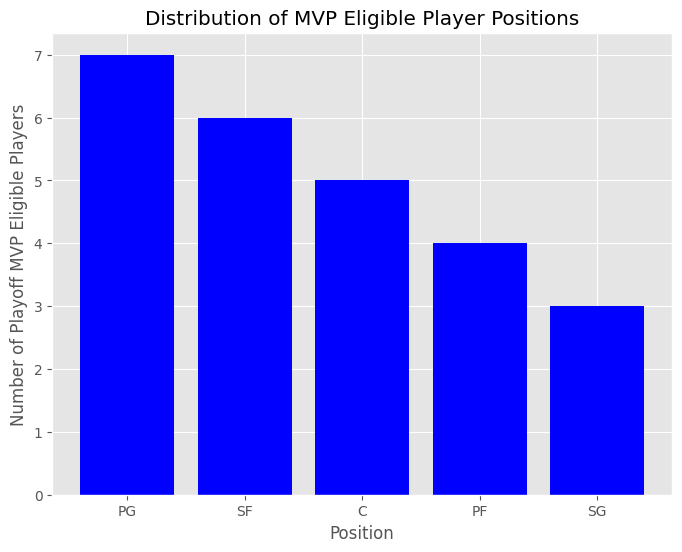

In [448]:
position_counts = df_playoff_new['Pos'].value_counts()

plt.figure(figsize = (8,6))
plt.bar(position_counts.index, position_counts.values, color = 'blue')

plt.xlabel('Position')
plt.ylabel('Number of Playoff MVP Eligible Players')
plt.title('Distribution of MVP Eligible Player Positions')
plt.show()


<Axes: title={'center': 'Top 10 Scorers (Players)'}, xlabel='Player', ylabel='Points Per Game'>

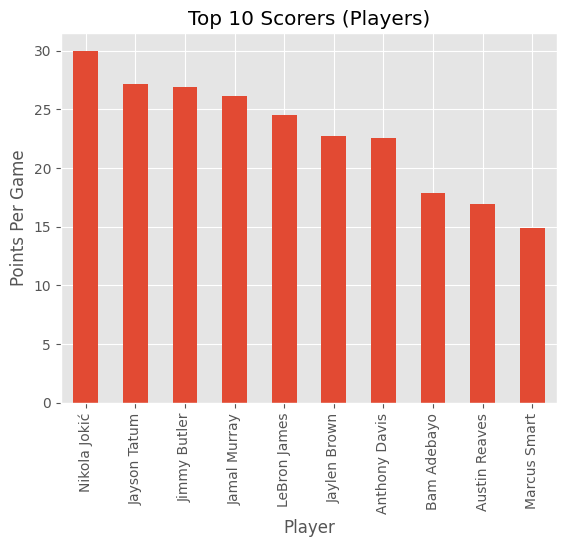

In [449]:
df_playoff_top = df_playoff_new.sort_values(by = 'PTS', ascending=False).head(10)
df_playoff_top['PTS'].plot(kind='bar', title='Top 10 Scorers (Players)', xlabel = 'Player', ylabel = 'Points Per Game')

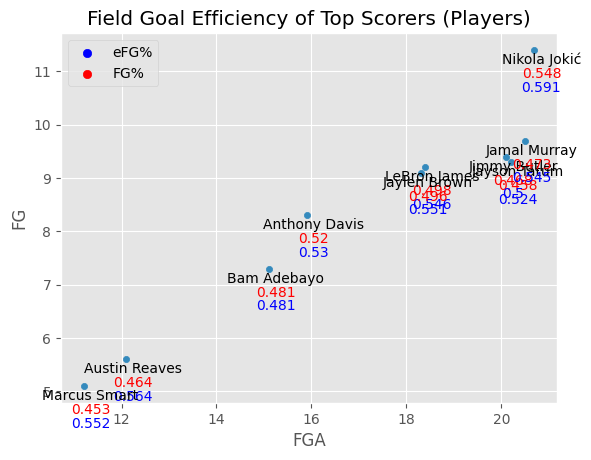

,PTS,FG,FGA,FG%,eFG%
Player,,,,,
Nikola Jokić,30.0,11.4,20.7,0.548,0.591
Jayson Tatum,27.2,9.3,20.2,0.458,0.524
Jimmy Butler,26.9,9.4,20.1,0.468,0.500
Jamal Murray,26.1,9.7,20.5,0.473,0.545
LeBron James,24.5,9.2,18.4,0.498,0.546
Jaylen Brown,22.7,9.1,18.3,0.496,0.551
Anthony Davis,22.6,8.3,15.9,0.520,0.530
Bam Adebayo,17.9,7.3,15.1,0.481,0.481
Austin Reaves,16.9,5.6,12.1,0.464,0.564


In [450]:
pointsfg = ['PTS','FG', 'FGA', 'FG%', 'eFG%']

ax = df_playoff_top.plot(kind = 'scatter', title = 'Field Goal Efficiency of Top Scorers (Players)', x = 'FGA', y = 'FG')
for i, row in df_playoff_top.iterrows():
    ax.annotate(row.name, (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['FG%'], (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')
    ax.annotate(row['eFG%'], (row['FGA'], row['FG']), textcoords="offset points", xytext=(5, -30), ha='center', color = 'blue')

ax.scatter([], [], marker='o', label='eFG%', color='blue', alpha=1)
ax.scatter([], [], marker='o', label='FG%', color='red', alpha=1)

ax.legend()

plt.show()
df_playoff_top[pointsfg]


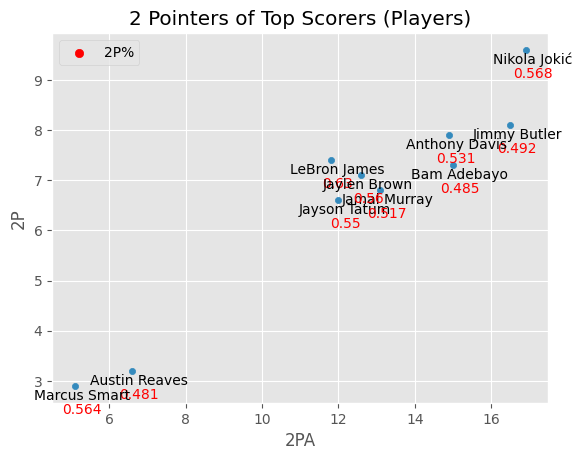

,PTS,2P,2PA,2P%
Player,,,,
Nikola Jokić,30.0,9.6,16.9,0.568
Jayson Tatum,27.2,6.6,12.0,0.550
Jimmy Butler,26.9,8.1,16.5,0.492
Jamal Murray,26.1,6.8,13.1,0.517
LeBron James,24.5,7.4,11.8,0.630
Jaylen Brown,22.7,7.1,12.6,0.560
Anthony Davis,22.6,7.9,14.9,0.531
Bam Adebayo,17.9,7.3,15.0,0.485
Austin Reaves,16.9,3.2,6.6,0.481


In [451]:
points2 = ['PTS','2P', '2PA', '2P%']

ax = df_playoff_top.plot(kind = 'scatter', title = '2 Pointers of Top Scorers (Players)', x = '2PA', y = '2P')
for i, row in df_playoff_top.iterrows():
    ax.annotate(row.name, (row['2PA'], row['2P']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['2P%'], (row['2PA'], row['2P']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')

ax.scatter([], [], marker='o', label='2P%', color='red', alpha=1)

ax.legend()

plt.show()
df_playoff_top[points2]


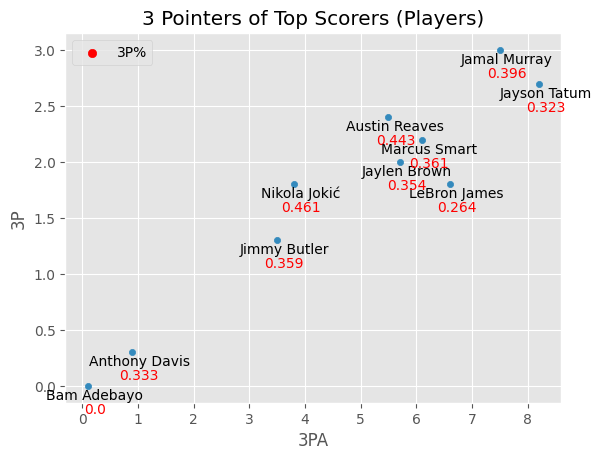

,PTS,3P,3PA,3P%
Player,,,,
Nikola Jokić,30.0,1.8,3.8,0.461
Jayson Tatum,27.2,2.7,8.2,0.323
Jimmy Butler,26.9,1.3,3.5,0.359
Jamal Murray,26.1,3.0,7.5,0.396
LeBron James,24.5,1.8,6.6,0.264
Jaylen Brown,22.7,2.0,5.7,0.354
Anthony Davis,22.6,0.3,0.9,0.333
Bam Adebayo,17.9,0.0,0.1,0.000
Austin Reaves,16.9,2.4,5.5,0.443


In [452]:
points3 = ['PTS','3P', '3PA', '3P%']

ax = df_playoff_top.plot(kind = 'scatter', title = '3 Pointers of Top Scorers (Players)', x = '3PA', y = '3P')
for i, row in df_playoff_top.iterrows():
    ax.annotate(row.name, (row['3PA'], row['3P']), textcoords="offset points", xytext=(5, -10), ha='center')
    ax.annotate(row['3P%'], (row['3PA'], row['3P']), textcoords="offset points", xytext=(5, -20), ha='center', color = 'red')

ax.scatter([], [], marker='o', label='3P%', color='red', alpha=1)

ax.legend()

plt.show()
df_playoff_top[points3]


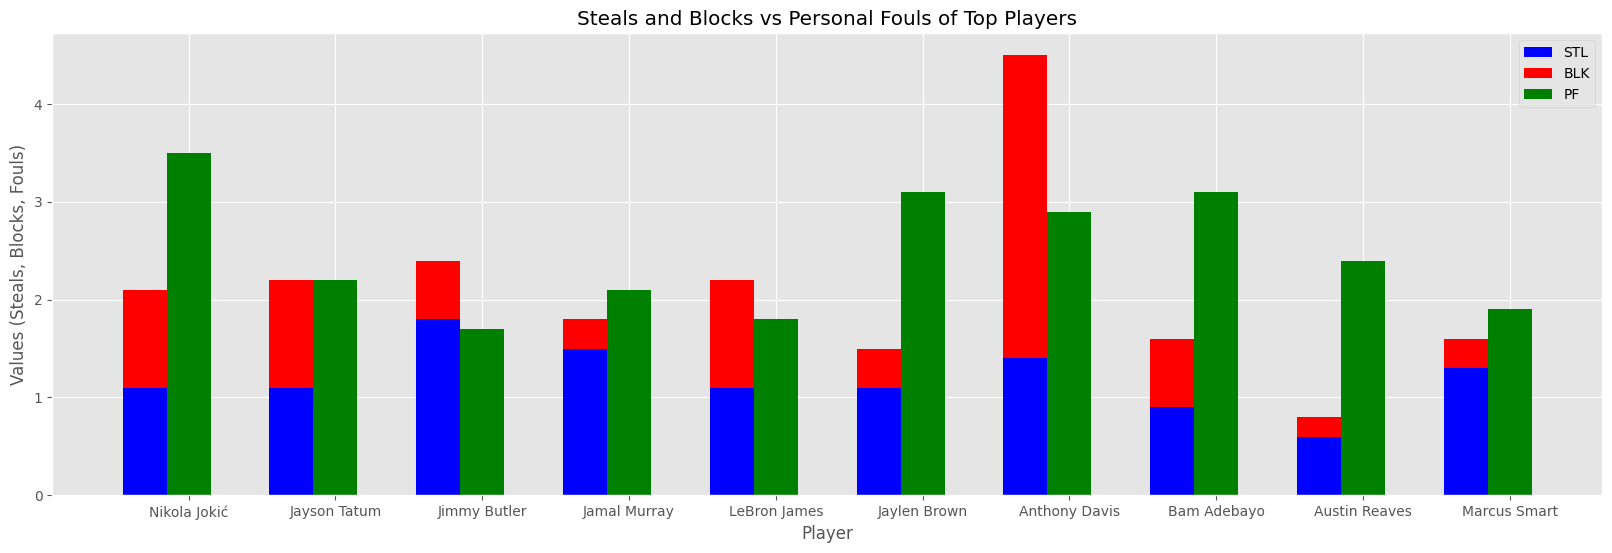

,PTS,STL,BLK,PF
Player,,,,
Nikola Jokić,30.0,1.1,1.0,3.5
Jayson Tatum,27.2,1.1,1.1,2.2
Jimmy Butler,26.9,1.8,0.6,1.7
Jamal Murray,26.1,1.5,0.3,2.1
LeBron James,24.5,1.1,1.1,1.8
Jaylen Brown,22.7,1.1,0.4,3.1
Anthony Davis,22.6,1.4,3.1,2.9
Bam Adebayo,17.9,0.9,0.7,3.1
Austin Reaves,16.9,0.6,0.2,2.4


In [453]:
points_STL_BLK_PF = ['PTS', 'STL', 'BLK', 'PF']

ind = np.arange(len(df_playoff_top))
width = 0.3
plt.figure(figsize=(20, 6))
plt.bar(ind - width, df_playoff_top['STL'], width, label='STL', color='blue')
plt.bar(ind - width, df_playoff_top['BLK'], width, label='BLK', color='red', bottom=df_playoff_top['STL'])
plt.bar(ind, df_playoff_top['PF'], width, label='PF', color='green')

plt.xlabel('Player')
plt.ylabel('Values (Steals, Blocks, Fouls)')
plt.title('Steals and Blocks vs Personal Fouls of Top Players')
plt.xticks(ind, df_playoff_top.index)  # Set x-axis labels
plt.legend()
plt.show()

df_playoff_top[points_STL_BLK_PF]

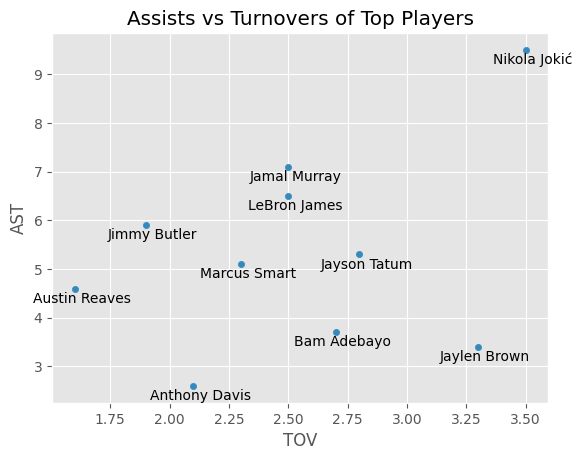

,PTS,AST,TOV
Player,,,
Nikola Jokić,30.0,9.5,3.5
Jayson Tatum,27.2,5.3,2.8
Jimmy Butler,26.9,5.9,1.9
Jamal Murray,26.1,7.1,2.5
LeBron James,24.5,6.5,2.5
Jaylen Brown,22.7,3.4,3.3
Anthony Davis,22.6,2.6,2.1
Bam Adebayo,17.9,3.7,2.7
Austin Reaves,16.9,4.6,1.6


In [454]:
points_tov_ast = ['PTS', 'AST', 'TOV']

ax = df_playoff_top.plot(kind = 'scatter', title = 'Assists vs Turnovers of Top Players', x = 'TOV', y = 'AST')
for i, row in df_playoff_top.iterrows():
    ax.annotate(row.name, (row['TOV'], row['AST']), textcoords="offset points", xytext=(5, -10), ha='center')

plt.show()
df_playoff_top[points_tov_ast]


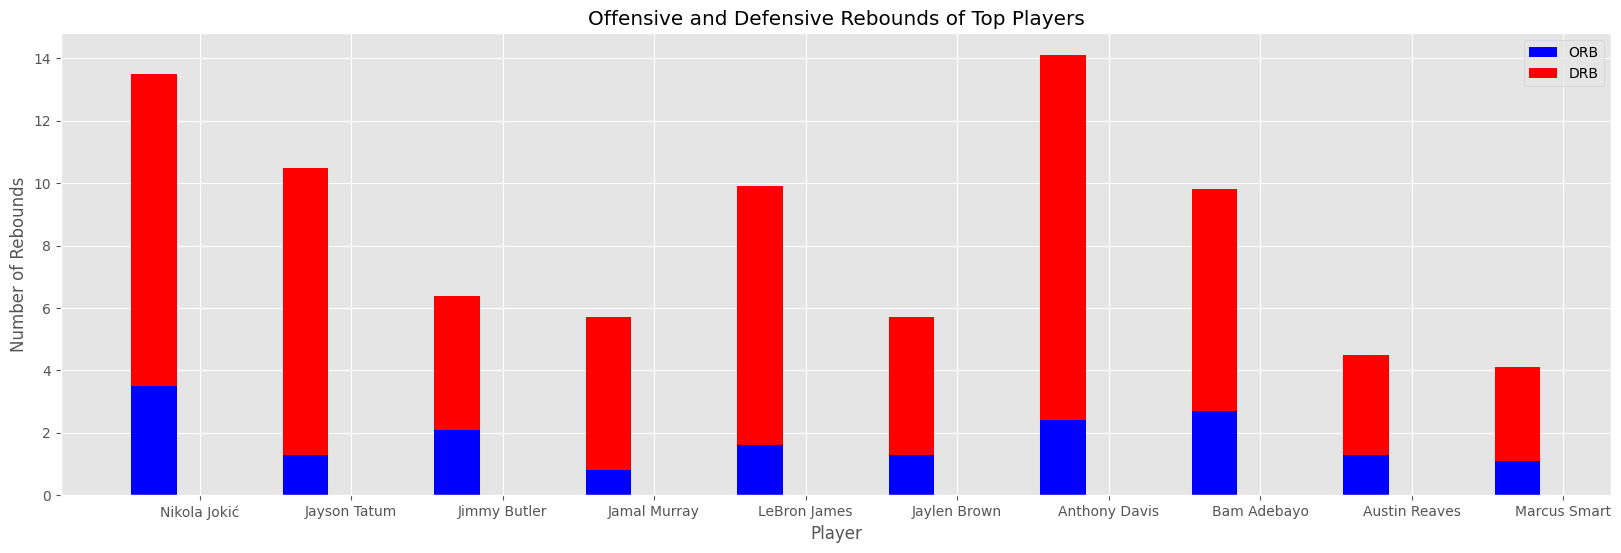

In [455]:
rebounds = ['ORB', 'DRB', 'TRB']
df_playoff_top[rebounds]

ind = np.arange(len(df_playoff_top))
width = 0.3
plt.figure(figsize=(20, 6))
plt.bar(ind - width, df_playoff_top['ORB'], width, label='ORB', color='blue')
plt.bar(ind - width, df_playoff_top['DRB'], width, label='DRB', color='red', bottom=df_playoff_top['ORB'])

plt.xlabel('Player')
plt.ylabel('Number of Rebounds')
plt.title('Offensive and Defensive Rebounds of Top Players')
plt.xticks(ind, df_playoff_top.index)  # Set x-axis labels
plt.legend()
plt.show()

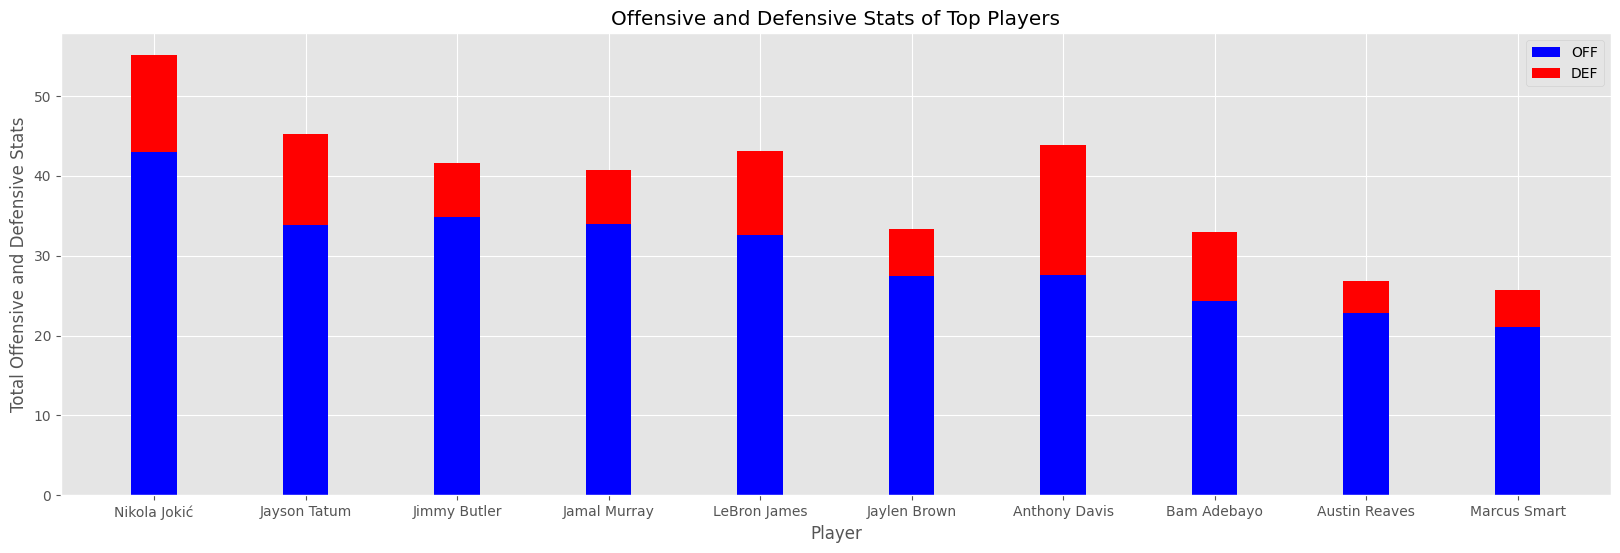

In [456]:
off_def_stats = ['Tot_OFF', 'Tot_DEF']

ind = np.arange(len(df_playoff_top))
plt.figure(figsize=(20, 6))
plt.bar(ind, df_playoff_top['Tot_OFF'], width, label='OFF', color='blue')
plt.bar(ind, df_playoff_top['Tot_DEF'], width, label='DEF', color='red', bottom=df_playoff_top['Tot_OFF'])

plt.xlabel('Player')
plt.ylabel('Total Offensive and Defensive Stats')
plt.title('Offensive and Defensive Stats of Top Players')
plt.xticks(ind, df_playoff_top.index)  # Set x-axis labels
plt.legend()
plt.show()

After looking at the individual performances of each of the top players, it is also important to consider how well the players' respective teams performed. High individual stats are more valuable when they strongly contribute to and influence the team's performance (victories).

In [457]:
df_playoffs_standings.set_index('Rk', inplace = True)
df_playoffs_standings

,Team,Overall
Rk,,
1,Denver Nuggets,16-4
2,Miami Heat,13-10
3,Boston Celtics,11-9
4,Los Angeles Lakers,8-8
5,Philadelphia 76ers,7-4
6,Golden State Warriors,6-7
7,New York Knicks,6-5
8,Phoenix Suns,6-5
9,Sacramento Kings,3-4


In [458]:
df_playoff_top['Tm']

Player
Nikola Jokić     DEN
Jayson Tatum     BOS
Jimmy Butler     MIA
Jamal Murray     DEN
LeBron James     LAL
Jaylen Brown     BOS
Anthony Davis    LAL
Bam Adebayo      MIA
Austin Reaves    LAL
Marcus Smart     BOS
Name: Tm, dtype: object

Step 5: Saving the Data as a File

In [459]:
df_playoff_top = df_playoff_top.reset_index()
df_playoff_top.to_csv('nba_playoff_stats_top.csv', index = False)

In [460]:
df_playoff_new = df_playoff_new.reset_index()
df_playoff_new.to_csv('nba_playoff_stats_playoffmvp_eligible.csv', index = False)